<a href="https://colab.research.google.com/github/soyudea/Laboratorio_Modelo_Jesus_tamayo/blob/main/Copia_de_LAB_05_02_MODEL_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as omara.torres@udea.edu.co ... please wait
using course session ai4eng.v1.udea.r2::2023.1
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))

x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 30, 49, 11,  4],
       [ 2, 88, 86, 80, 55],
       [ 3, 99, 79, 39, 46],
       [ 4, 67, 70, 18, 63],
       [ 5, 16, 32, 95, 30],
       [ 6, 15,  4, 96, 73],
       [ 7, 61, 81, 48, 14],
       [ 8, 68, 48, 99, 49],
       [ 9, 69, 25, 54, 76],
       [10, 73,  4, 28, 10],
       [11, 43, 93, 90, 89],
       [12, 86, 96, 22, 39],
       [13, 70, 36, 39, 67],
       [14, 74, 88, 75, 59],
       [15, 17, 73, 77, 72],
       [16, 34, 72, 94, 86],
       [17, 77, 20, 51, 36],
       [18, 48, 14, 96, 69],
       [19, 20,  2, 57, 86]])

In [ ]:
ridxs = np.r_[2,4,5]

x[ridxs]


In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

In [ ]:
x[ridxs][:, cidxs]

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x


In [ ]:
x[3:10,1:3]

In [ ]:
x[3:]

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

In [ ]:
v[:5]
print(v)
v[5:]


[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([102, 116, 117, 118, 110, 106, 108, 107, 112, 101, 100, 119, 105,
       109, 114, 111, 113, 103, 104, 115])

or the first natural numbers

In [ ]:
p = np.random.permutation(8)
print(p)

[2 7 0 1 5 4 3 6]


In [ ]:
a = np.array([1,2,3,4,5,67])
b = np.random.permutation(a)
b

array([67,  3,  5,  4,  2,  1])

how do you interpret this?

In [ ]:
print(v)
v[p[5:]]
print(v)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
x[p[:5]]

array([[ 2, 61, 50, 26, 58],
       [ 7, 84,  6, 78, 85],
       [ 0,  1,  2,  3,  4],
       [ 1, 35, 74, 41, 68],
       [ 5, 38, 12, 27, 97]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


**Ejercicio tarea 1**

In [ ]:
def split_data(X, y, pct):
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    X = np.random.permutation(X)
    n1 = int(X.shape[0]*pct)      #Numero de filas para X1
    n2 = int(X.shape[0]) - n1     #Numero de filas para X2
    permutation_partition_1 = X
    X1 =  permutation_partition_1[:n1,:]    #X1 tendrá n1 filas todas la columnas
    permutation_partition_2 = permutation_partition_1[n1:,:] #X2 tendra una matriz que va desde la fila n1 hasta el resto, todas las columnas
    X2 =  permutation_partition_2  
    y1 = y[:n1]
    y2 = y[n1:]
    return X1, X2, y1, y2


check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 92 15 16 51 17 94 34]
 [ 2 72 64 91 28  4 80 91]
 [ 3  9 75 79 12 36 16  2]
 [ 4 59 25  0 18 30 80 44]
 [ 5 90 14 98 45 23 41 76]
 [ 6 10 32 66 19 84 61  5]
 [ 7 76 76  4 87 19 54 71]
 [ 8 82 33 55 77 69  8 82]
 [ 9 75 22 52 12 97 22 69]
 [10 96 70  2 40 33 40 51]
 [11 38 58 33 45 93 18  5]
 [12 80 28 34 62 49 59 86]
 [13 13  1  7 52 18 41 78]
 [14 40 24 70 15 47 12 19]
 [15 96 15 84 86 44 42 88]
 [16 43 13  8 59 92 86 56]
 [17 64 25 20 77 74 77 80]
 [18 52 11 19 63 16 36 16]
 [19 26 18 57 80 62 79 25]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6705, 6705, 2190, 2190)

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 6 51 84  7 58 74 92 87]
 [ 3 67 48 66 21 25 80 29]
 [ 4 50 85 33  7  1 95 38]
 [ 8 21 23  8 69 10 62 35]
 [14 51 17  7  1  2 21  5]
 [ 9 37 44 29 12 64  5 67]
 [10 36 95 77 89 97 34 53]
 [18 84 57 47 77 40  0 80]
 [13 11 68 83 31 36 30 27]
 [16  0 11 38 20 56 47 69]
 [ 5 11 28 25 65 43 21 66]
 [ 1 35  5 84 53 43 36 27]
 [ 7 83 14 86 53 91 84 80]
 [11 63 62 30 43 76 26 22]] 
--
[[17 26 47 16 15  4 65 54]
 [ 0  1  2  3  4  5  6  7]
 [12 12 43 48 26 36 71 72]
 [15 34 86 83 86 22 95 31]
 [ 2  8 21 82 36 99 46 90]
 [19 67  8 42 37 18 42  8]] 
--
[100 101 102 103 104 105 106 107 108 109 110 111 112 113] 
--
[100 101 102 103 104 105] 
--


In [ ]:
Xts

array([[17, 26, 47, 16, 15,  4, 65, 54],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [12, 12, 43, 48, 26, 36, 71, 72],
       [15, 34, 86, 83, 86, 22, 95, 31],
       [ 2,  8, 21, 82, 36, 99, 46, 90],
       [19, 67,  8, 42, 37, 18, 42,  8]])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

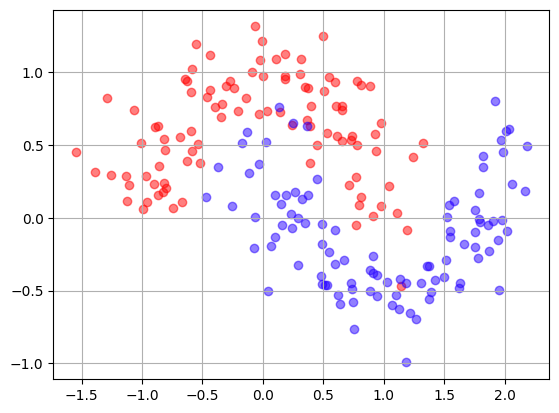

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.494725, 0.505275)

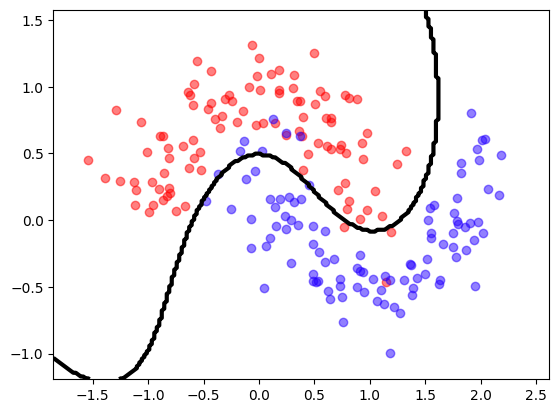

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"

    def split_data(X, y, pct):
          assert len(X)==len(y), "X and y must have the same length"
          assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
         
          n1 = int(X.shape[0]*pct)
          n2 = int(X.shape[0]) - n1
          permutation_partition_1 = X
          X1 =  permutation_partition_1[:n1,:] 
          permutation_partition_2 = permutation_partition_1[n1:,:] 
          X2 =  permutation_partition_2
          y1 = y[:n1]
          y2 = y[n1:]
          return X1, X2, y1, y2
    
    Xtrain, Xtest, Ytrain, Ytest = split_data(X, y, pct = 0.5)
    estimador = estimator.fit(Xtrain, Ytrain)
    predictions = estimator.predict(Xtrain)
       
    return estimador, predictions
  

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)

preds


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[0 5 3 7 4 0 6 7 4 8 4 1 2 2 3]


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[False  True False  True  True False  True  True  True False  True False
  True False False]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
a = y[y_less_than_5]
a

array([2, 3, 0, 2, 3, 0, 0, 4])

In [ ]:
b = y[y<5]
b

array([2, 3, 0, 2, 3, 0, 0, 4])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([19, 15, 12, 11, 19, 19,  7, 12, 10, 12, 18, 11,  7, 17, 18])

In [ ]:
v[y<5]

array([15, 11, 19,  7, 12, 10, 18,  7])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    X1 = X[ y == 0]
    X2 = X[y==1]
    return X1, X2

check manually your code

In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:
def accuracy(y_true, y_pred):
    y = y_true[y_true == y_pred]
    result = y.size/ len(y_pred)
    return result

In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:

def split_fit_predict(estimator, X, y, train_pct):
      #Función Que divide el dataset
      def split_data(X, y, pct):
          assert len(X)==len(y), "X and y must have the same length"
          assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
          X = np.random.permutation(X)
          n1 = int(X.shape[0]*pct)
          n2 = int(X.shape[0]) - n1
          permutation_partition_1 = X
          X1 =  permutation_partition_1[:n1,:] 
          permutation_partition_2 = permutation_partition_1[n1:,:] 
          X2 =  permutation_partition_2
          y1 = y[:n1]
          y2 = y[n1:]
          return X1, X2, y1, y2
      #Función que calcula el accuracy
      def accuracy(y_true, y_pred):
          y = y_true[y_true == y_pred]
          result = y.size/ len(y_pred)
          return result

      Xtrain, Xtest, ytrain, ytest = split_data(X, y, train_pct) #Llama a la función que divide el dataset 
      estimator = estimator.fit(Xtrain, ytrain)                  #Entrenamiento del modelo 
      preds_ts = np.round(estimator.predict(Xtest),8)            #Prediccion sobre los datos de prueba

      return estimator, Xtest, ytest, accuracy(ytest, preds_ts)
        
        

In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[-0.90357   ,  0.75000288],
        [ 0.01553523,  0.04499749],
        [ 1.1948165 , -0.08510137],
        [ 1.65070457,  0.02492031],
        [-0.02743064,  0.7256808 ],
        [-0.19155845,  0.71464804],
        [ 0.49157933,  0.50815236],
        [-0.48005884,  0.53405144],
        [ 0.44414591,  0.99229466],
        [ 0.10220608,  0.49808834]]),
 array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1]),
 0.8)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
